In [12]:
! pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
%matplotlib inline

  Using cached yfinance-0.1.87-py2.py3-none-any.whl (29 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


In [13]:
stocks = input("enter the code of the stock: ")
data = yf.download(stocks,"2008-01-01","2022-11-22")
data.head()

enter the code of the stock: NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.572,7.876,7.564,7.850,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,7.967,53775


In [16]:
data.shape

(3750, 6)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3750 entries, 2008-01-02 to 2022-11-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3750 non-null   float64
 1   High       3750 non-null   float64
 2   Low        3750 non-null   float64
 3   Close      3750 non-null   float64
 4   Adj Close  3750 non-null   float64
 5   Volume     3750 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 205.1 KB


In [18]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,3.890829,3.977611,3.801273,3.885236,3.885236,130433.177867
std,1.905145,1.955519,1.851397,1.900977,1.900977,54202.832837
min,1.441000,1.567000,1.432000,1.482000,1.482000,0.000000
25%,2.730250,2.776000,2.680250,2.728000,2.728000,91811.250000
50%,3.420500,3.486500,3.344500,3.416500,3.416500,125280.500000
75%,4.340000,4.416250,4.251000,4.339000,4.339000,160203.250000
max,13.580000,13.694000,13.306000,13.577000,13.577000,459196.000000


<module 'matplotlib.pyplot' from 'C:\\Users\\wayne\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

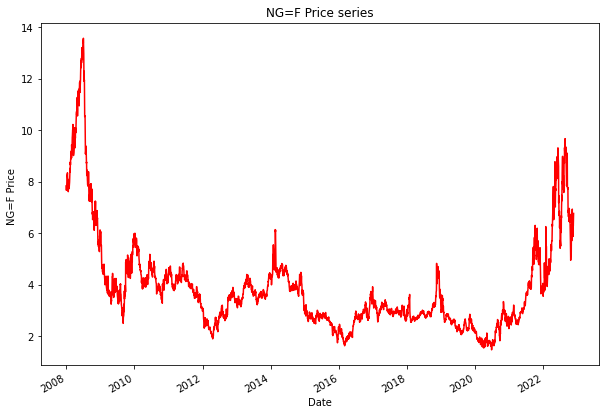

In [19]:
data.Close.plot(figsize = (10,7),color = 'r')
plt.title("{} Price series".format(stocks))# In[ ]:
plt.ylabel("{} Price ".format(stocks))
plt  #NG=F的股票價格趨勢

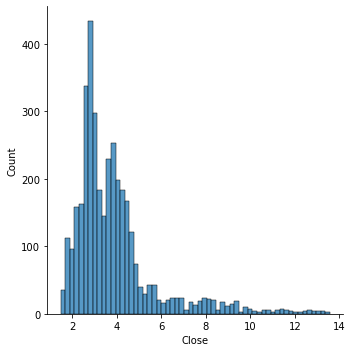

In [20]:
sns.displot(data["Close"])  #Close 的數據

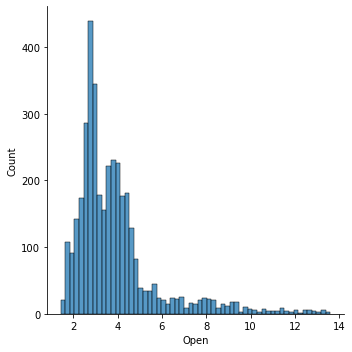

In [21]:
sns.displot(data["Open"])  #Open 的數據

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = data.drop("Close", axis = 1)
y = data["Close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_linear_regression = LinearRegression()
model_linear_regression.fit(x_train, y_train)
prediction = model_linear_regression.predict(x_test)
prediction

array([ 2.727     ,  2.62100005,  2.66799998,  4.875     ,  3.69000006,
        2.73399997, 11.39900017,  3.31500006,  4.86299992,  3.55800009,
        2.86199999,  2.44499993,  5.29799986,  4.03100014,  4.70800018,
        3.81399989,  2.84599996,  2.80599999,  1.78900003,  4.53000021,
        3.97300005,  2.58599997,  2.94499993,  2.34100008,  2.9230001 ,
        2.68199992,  6.13500023,  3.8900001 ,  3.91599989,  2.8440001 ,
       13.01099968,  3.93000007,  1.847     ,  2.75999999,  8.32400036,
        2.76399994,  2.69700003,  4.87400007,  3.12700009,  2.14700007,
        2.8210001 ,  7.95599985,  2.19099998,  2.74000001,  4.66200018,
        6.31799984,  5.46000004,  2.11999989,  4.29400015,  3.9460001 ,
        9.68000031,  3.16599989,  2.60899997,  1.83000004,  4.60900021,
        5.60500002,  2.79999995,  3.78200006,  2.93799996,  2.44799995,
        8.97700024,  2.87299991,  4.36899996,  3.56200004,  1.74600005,
        4.28200006,  4.26100016,  5.76800013,  3.66799998,  2.73

In [31]:
# rmse mse r2_square
from sklearn.metrics import mean_squared_error, r2_score  #沒有rmse所以要自己寫

# y_test是抓下來的的data   y_pred 是 model預測的結果

def calcuate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  #就這麼簡單
    r2_scors = r2_score(y_test, y_pred)
    
    print("mse= ", mse)
    print("rmse= ", rmse)
    print("r2_score= ", r2_scors)
    
    
calcuate_metrics(y_test,prediction)  #使用上面的 calcuate_metrics function 看看mse rmse r2_score如何

mse=  1.8880202475107085e-29
rmse=  4.345135495598162e-15
r2_score=  1.0


In [35]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(x_train, y_train)
ri = Ridge().fit(x_train, y_train)

la_pred = la.predict(x_test)
ri_pred = ri.predict(x_test)

calcuate_metrics(y_test, la_pred)
calcuate_metrics(y_test, ri_pred)
# Ridge 比 Lasso好

mse=  0.2603183270153916
rmse=  0.5102140011949805
r2_score=  0.9244462163726133
mse=  2.1765905655506887e-05
rmse=  0.0046653944801599454
r2_score=  0.9999936827477911


In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C':[0.1, 1, 10, 100, 1000],
             'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
             'kernel':['rbf']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.047 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.053 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.059 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.079 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.047 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.053 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.075 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.058 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.078 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.004 total time=   0.6s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.000 total time=   0.6s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.003 total time=   0.6s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.005 total time=   0.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.012 total time=   0.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   0.6s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.013 total time=   0.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.005 total time=   0.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.072 total time=   0.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.024 total time=   0.6s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [40]:
svr = SVR(C = 10, gamma = 0.01,kernel = 'rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

In [43]:
import joblib 

joblib.dump(ri, 'model.pkl')
ridge_from_joblib = model = joblib.load("model.pkl")